In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeManilaV2

# Get a fake backend from the fake provider
backend = FakeManilaV2()

# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [2]:
from qiskit import transpile

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw()

global phase: π/4
                                                                 
ancilla_0 -> 0 ──────────────────────────────────────────────────
                                                                 
ancilla_1 -> 1 ──────────────────────────────────────────────────
                                           ┌───┐      ░    ┌─┐   
      q_1 -> 2 ────────────────────────────┤ X ├──────░────┤M├───
               ┌─────────┐┌────┐┌─────────┐└─┬─┘      ░ ┌─┐└╥┘   
      q_0 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────■───░─┤M├─╫────
               └─────────┘└────┘└─────────┘     ┌─┴─┐ ░ └╥┘ ║ ┌─┐
      q_2 -> 4 ─────────────────────────────────┤ X ├─░──╫──╫─┤M├
                                                └───┘ ░  ║  ║ └╥┘
       meas: 3/══════════════════════════════════════════╩══╩══╩═
                                                         0  1  2

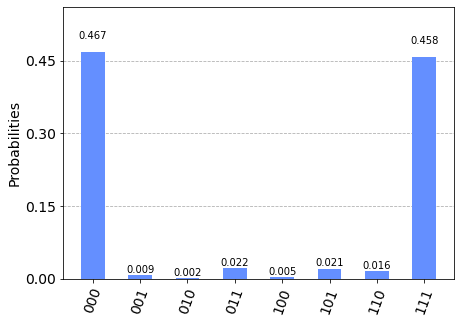

In [3]:
from qiskit.tools.visualization import plot_histogram

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)